In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 


In [46]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep=';')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [47]:
#Eliminar las filas duplicadas
df.drop_duplicates(inplace=True)
#0 valores nulos encontrados
# df.isnull().sum()
#Muchos valores unknown en la tabla 'default'
# df['default'].value_counts()
#Se elimina la columna 'duration' principalmente para evitar la fuga de datos (data leakage).
df['pdays_contact'] = np.where(df['pdays'] == 999, 0 , 1)
df = df.drop(['default','duration','pdays'], axis=1)

Volver pdays en numerica debido a los valores 999, es una binaria, fue contactado el cliente en los ultimos dias No=0, si=1, A continuacion borro la columna pdays

In [ ]:
#     #Data cleaning
# #I created a dictionary with the necessary calculated percentiles for every column needed.
# umbral_columns = {'age': df['age'].quantile(0.99),
#                 'campaign': df['campaign'].quantile(0.99),
#                 'previous': df['previous'].quantile(0.99),
#                 'emp.var.rate': df['emp.var.rate'].quantile(0.95),
#                 'cons.price.idx': df['cons.price.idx'].quantile(0.99),
#                 'euribor3m': df['euribor3m'].quantile(0.99),
#                 'nr.employed': df['nr.employed'].quantile(0.99)
#                 }
# #I combined conditions to accelerate the coding process.
# filter_combined_condition = ((df['age'] <= umbral_columns['age']) &
#                             (df['campaign'] <= umbral_columns['campaign']) &
#                             (df['previous'] <= umbral_columns['previous']) &
#                             (df['emp.var.rate'] <= umbral_columns['emp.var.rate']) &
#                             (df['cons.price.idx'] <= umbral_columns['cons.price.idx']) &
#                             (df['euribor3m'] <= umbral_columns['euribor3m']) &
#                             (df['nr.employed'] <= umbral_columns['nr.employed'])
#                             )
# #Apply the filter to the DataFrame
# df = df[filter_combined_condition]


# for columnas in df:
#     fig, axis = plt.subplots(figsize=(20, 7))
#     sns.countplot(data=df, x=columnas, hue="y")
#     plt.tight_layout()
#     plt.show()


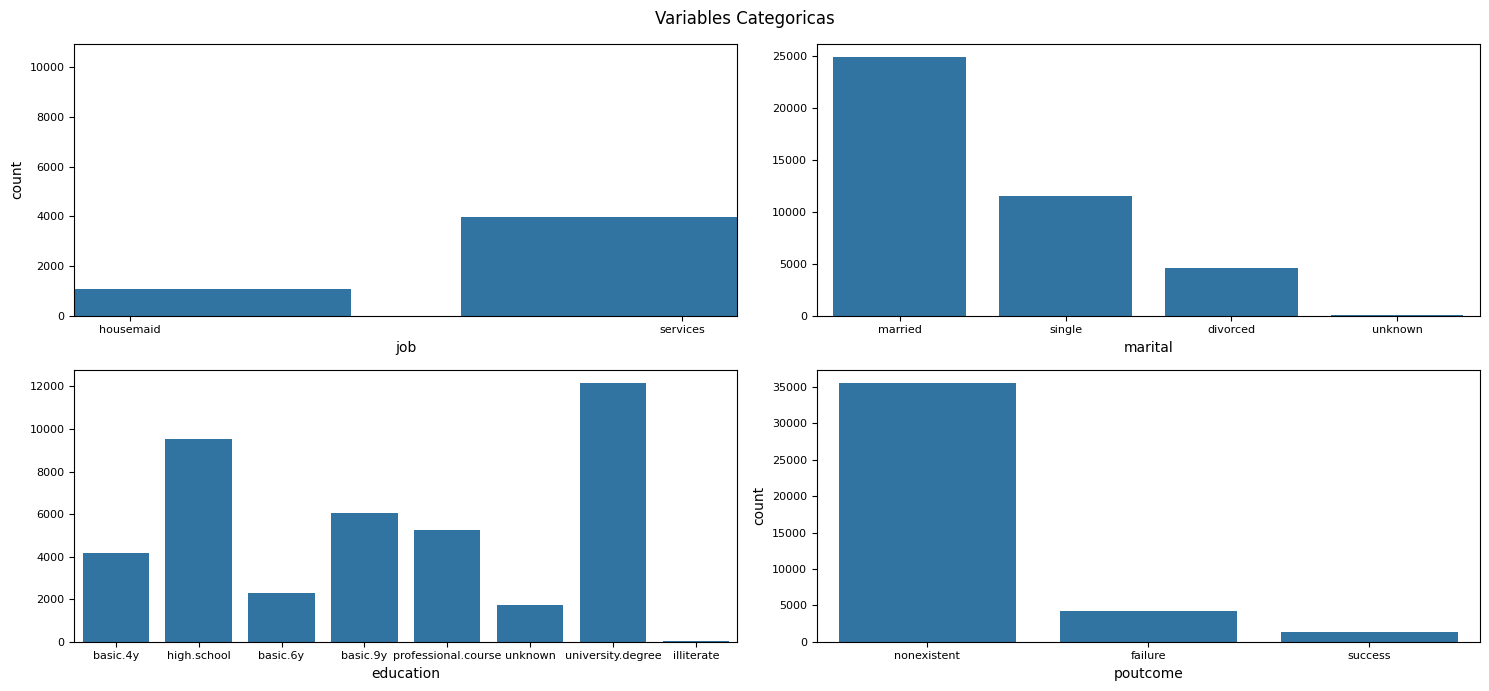

In [49]:
#variables categóricas
fig, axis = plt.subplots(2, 2, figsize=(15, 7))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.labelsize'] = 10

fig.suptitle('Variables Categoricas')

sns.countplot(ax=axis[0, 0], data=df, x="job").set_xlim(-0.1, 1.1)
sns.countplot(ax=axis[0, 1], data=df, x="marital").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="education").set(ylabel=None)
sns.countplot(ax=axis[1, 1], data=df, x="poutcome")

plt.tight_layout()

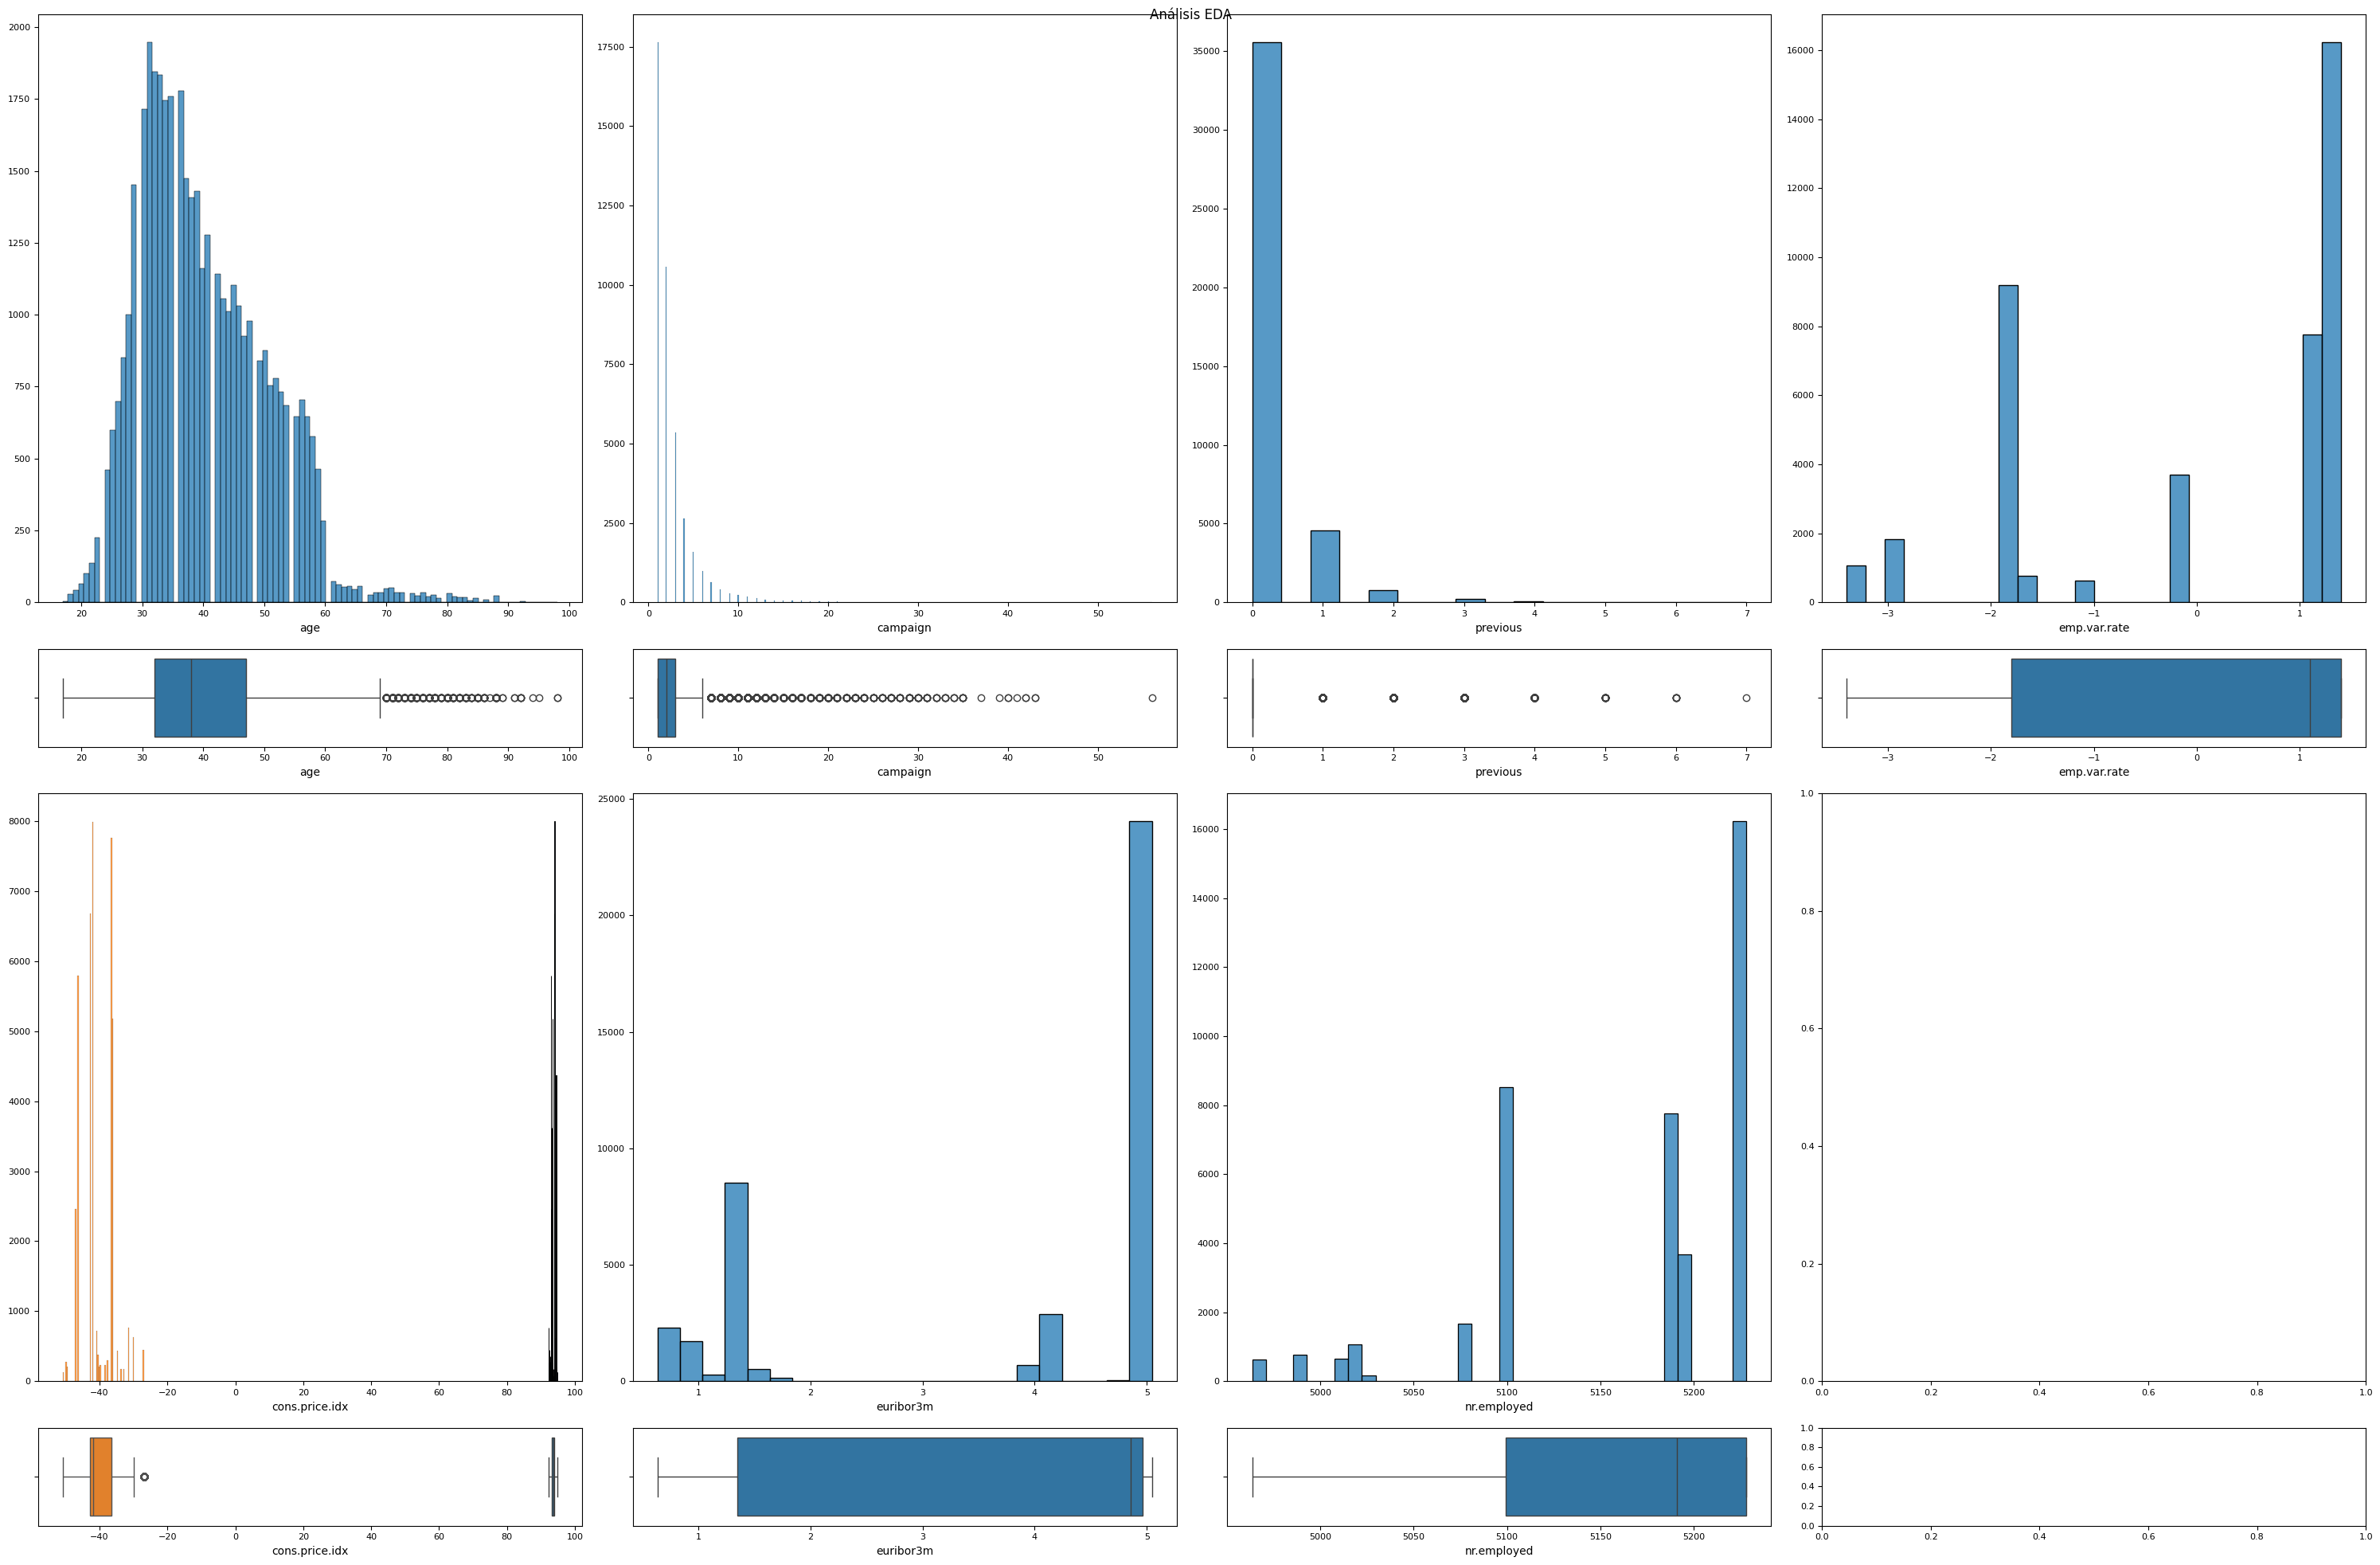

In [50]:
#Analysis de variables númericas
numeric_features = [
    'age', 'campaign', 'previous', 'emp.var.rate', 
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Configuración de la figura: 4 filas (para 4 variables), 2 columnas (para Histograma y Boxplot)
fig, axis = plt.subplots(4, 4, figsize=(30, 20), gridspec_kw={'height_ratios': [6,1,6,1]})

# Ajustes generales para el título
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.labelsize'] = 10
fig.suptitle('Análisis EDA')

sns.histplot(ax=axis[0, 0], data=df, x='age').set(ylabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x='age')

sns.histplot(ax=axis[0, 1], data=df, x='campaign').set(ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x='campaign')

sns.histplot(ax=axis[0, 2], data=df, x='previous').set(ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x='previous')

sns.histplot(ax=axis[0, 3], data=df, x='emp.var.rate').set(ylabel=None)
sns.boxplot(ax=axis[1, 3], data=df, x='emp.var.rate')

sns.histplot(ax=axis[2, 0], data=df, x='cons.price.idx').set(ylabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x='cons.price.idx')

sns.histplot(ax=axis[2, 0], data=df, x='cons.conf.idx').set(ylabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x='cons.conf.idx')


sns.histplot(ax=axis[2, 1], data=df, x='euribor3m').set(ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x='euribor3m')

sns.histplot(ax=axis[2, 2], data=df, x='nr.employed').set(ylabel=None)
sns.boxplot(ax=axis[3, 2], data=df, x='nr.employed')

plt.tight_layout()
plt.show()

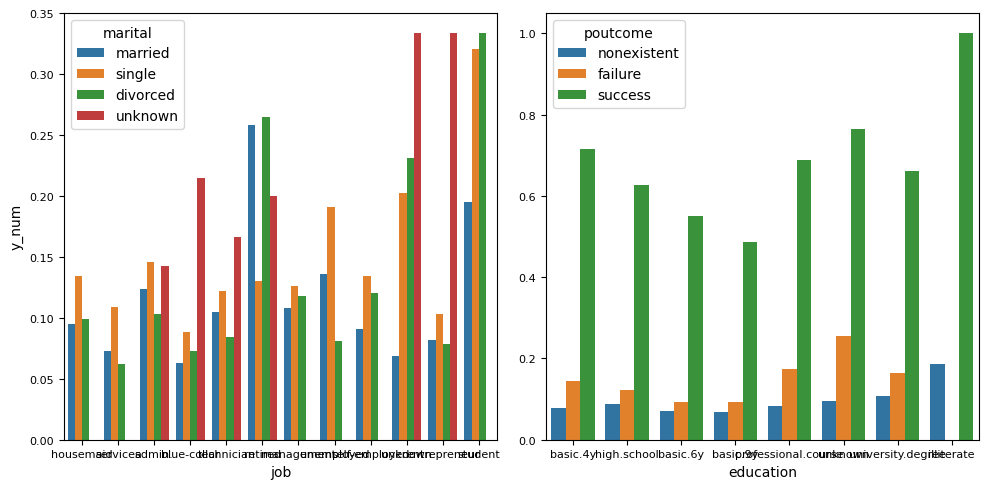

In [51]:
#Class Combinations with Multiple Predictors
df['y_num'] = df['y'].map({'no': 0, 'yes': 1})
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(df, x='job', y='y_num', ax=axis[0], hue='marital', errorbar=None)
sns.barplot(df, x='education', y ='y_num', ax=axis[1], hue='poutcome', errorbar=None).set(ylabel=None)

plt.tight_layout()

In [52]:
#AJUSTES PARA CORRELACIÓN
df_corr = df.copy()

df_corr['y'] = df_corr['y'].map({'no': 0, 'yes': 1})
categorical_cols = ['job', 'marital', 'education', 'contact', 
                    'month', 'day_of_week', 'poutcome', 'housing', 'loan']

for col in categorical_cols:
    df_corr[col], _ = pd.factorize(df_corr[col])


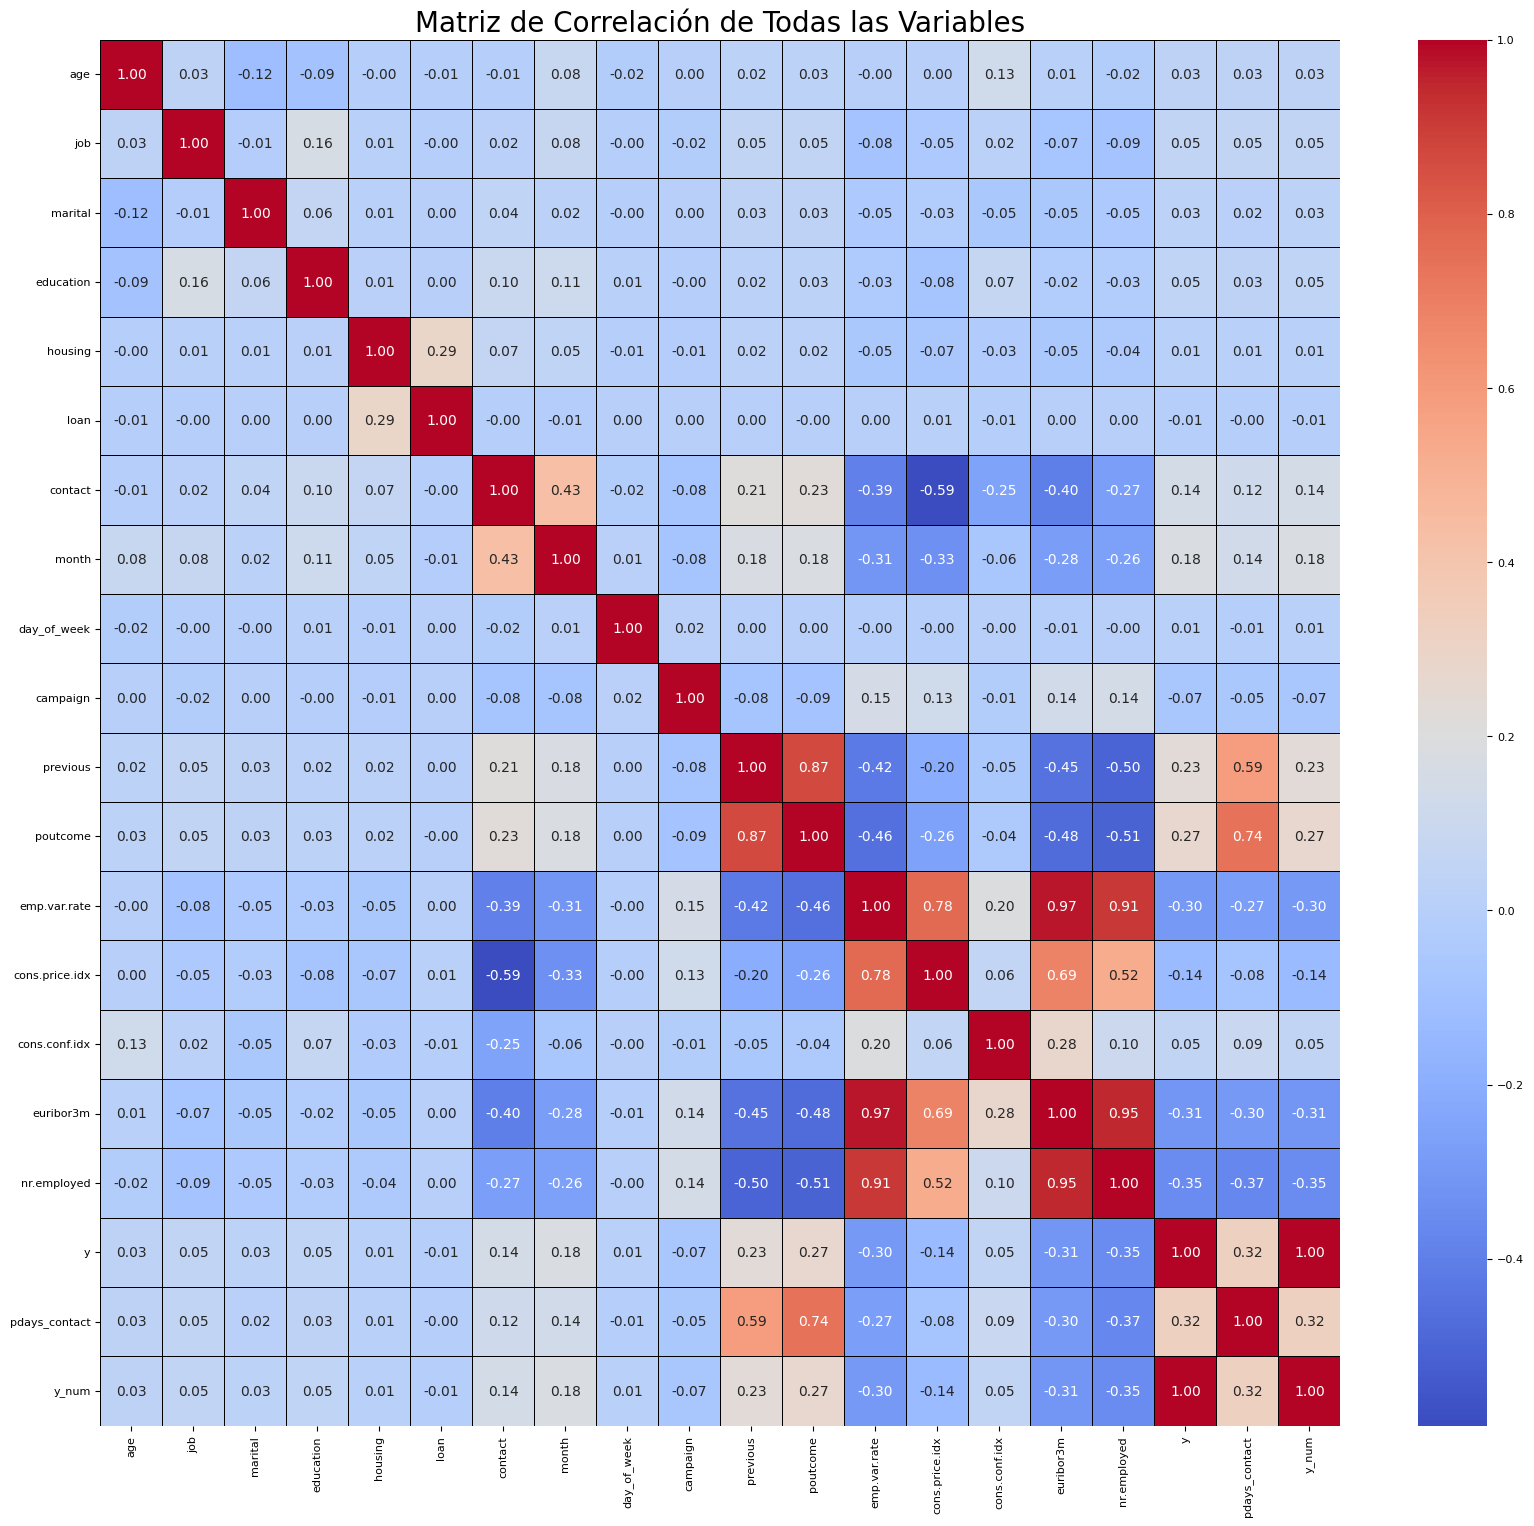

In [53]:
#CORRELACIÓN
# 1. Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# 2. Ajustar el tamaño de la figura (es grande, dado que tienes muchas variables)
plt.figure(figsize=(20, 18))

# 3. Generar el Mapa de Calor
sns.heatmap(
    correlation_matrix,
    annot=True, # Ponemos False para no saturar con números
    fmt=".2f", 
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title('Matriz de Correlación de Todas las Variables', fontsize=20)
plt.show()

In [54]:
#CODIFICACION DE LA VARIABLE OBJETIVO

#SEPARACIÓN Y CODIFICACIÓN DEL TARGET (y)
y = df['y'] 
X = df.drop(['y', 'y_num'], axis=1)
 #Identificación de columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    #CODIFICACIÓN DEL TARGET 'y' (Label Encoding)
    # Transforma 'no'/'yes' a 0/1.
y_encoded = LabelEncoder().fit_transform(y)
    #Aplicar codificación One-Hot
    # drop_first=True previene la multicolinealidad.
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'pdays_contact'],
      dtype='object')

In [55]:
#SPLIT STRATIFICADO
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, 
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y_encoded 
)
X_train.shape, y_test.shape

((32940, 50), (8236,))

In [56]:
#ESCALADO DE CARACTERÍSTICAS (Feature Scaling).
#Definir las columnas numéricas que no fueron One-Hot Encoded (8 en total)
numeric_features = ['age', 'campaign', 'previous', 'emp.var.rate',
                    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#Aplicar FIT y TRANSFORM (Ajustar y Transformar) solo al conjunto de ENTRENAMIENTO
# Es CRUCIAL ajustarlo SOLO en X_train para evitar Data Leakage (Fuga de Datos).
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [57]:
#ENTRENAMIENTO DEL MODELO.
#Inicializar el modelo
#class_weight='balanced' es esencial debido al desbalance de clases (89% 'no' vs 11% 'yes').
#Esto penaliza los errores de la clase minoritaria ('yes'), mejorando la predicción del target.
model = LogisticRegression(solver='lbfgs', random_state=42, class_weight='balanced', 
                           C=20)

# 2. Entrenar el modelo (FIT)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,20
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [58]:
#EVALUACIÓN DEL MODELO.
#Realizar predicciones en el conjunto de prueba (X_test)
y_pred = model.predict(X_test)

#Precisión general (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

#Reporte de Clasificación Detallado
clasification_report = classification_report(y_test, y_pred)

#Matriz de Confusión (para una visión clara de los errores)
confusion_report = confusion_matrix(y_test, y_pred)

print(clasification_report)
# accuracy_score(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.36      0.65      0.46       928

    accuracy                           0.83      8236
   macro avg       0.66      0.75      0.68      8236
weighted avg       0.88      0.83      0.85      8236



In [59]:
# Extraer los coeficientes y los nombres de las columnas
coefficients = model.coef_[0]
feature_names = X_train.columns

# Crear un DataFrame para facilitar el análisis
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
})

# Ordenar por el valor absoluto del coeficiente (importancia)
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Mostrar las 10 características más importantes
coef_df.head(10)


,Feature,Coefficient,Absolute_Coefficient
3,emp.var.rate,-2.415678,2.415678
39,month_mar,1.566764,1.566764
8,pdays_contact,1.247299,1.247299
4,cons.price.idx,1.186316,1.186316
35,month_aug,0.731588,0.731588
49,poutcome_success,0.717482,0.717482
36,month_dec,0.672938,0.672938
34,contact_telephone,-0.667709,0.667709
38,month_jun,-0.628272,0.628272
6,euribor3m,0.488394,0.488394


In [60]:
#reentrenar el modelo usando solo las variables más influyentes para simplificarlo y verificar si se mantiene el alto rendimiento (Recall).
#Características seleccionadas del TOP 10 de coeficientes
top_10_features = [
    'emp.var.rate', 'euribor3m', 'pdays_contact', 'cons.price.idx', 
    'poutcome_success', 'month_mar', 'month_aug', 'month_dec', 
    'contact_telephone', 'education_illiterate', 'month_jun' # Incluímos las 11 porque hay dos con valores muy cercanos
]

# Creamos los nuevos conjuntos de datos (subset)
X_train_selected = X_train[top_10_features]
X_test_selected = X_test[top_10_features]


In [61]:
#REENTRENAMIENTO Y EVALUACIÓN DEL MODELO SIMPLIFICADO
#Inicializar y entrenar el modelo (mismos hiperparámetros)
simplified_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
simplified_model.fit(X_train_selected, y_train)

#Realizar predicciones en el conjunto de prueba simplificado
y_pred_simplified = simplified_model.predict(X_test_selected)

#Reporte de Clasificación
print(classification_report(y_test, y_pred_simplified))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.37      0.63      0.47       928

    accuracy                           0.84      8236
   macro avg       0.66      0.75      0.69      8236
weighted avg       0.88      0.84      0.86      8236

